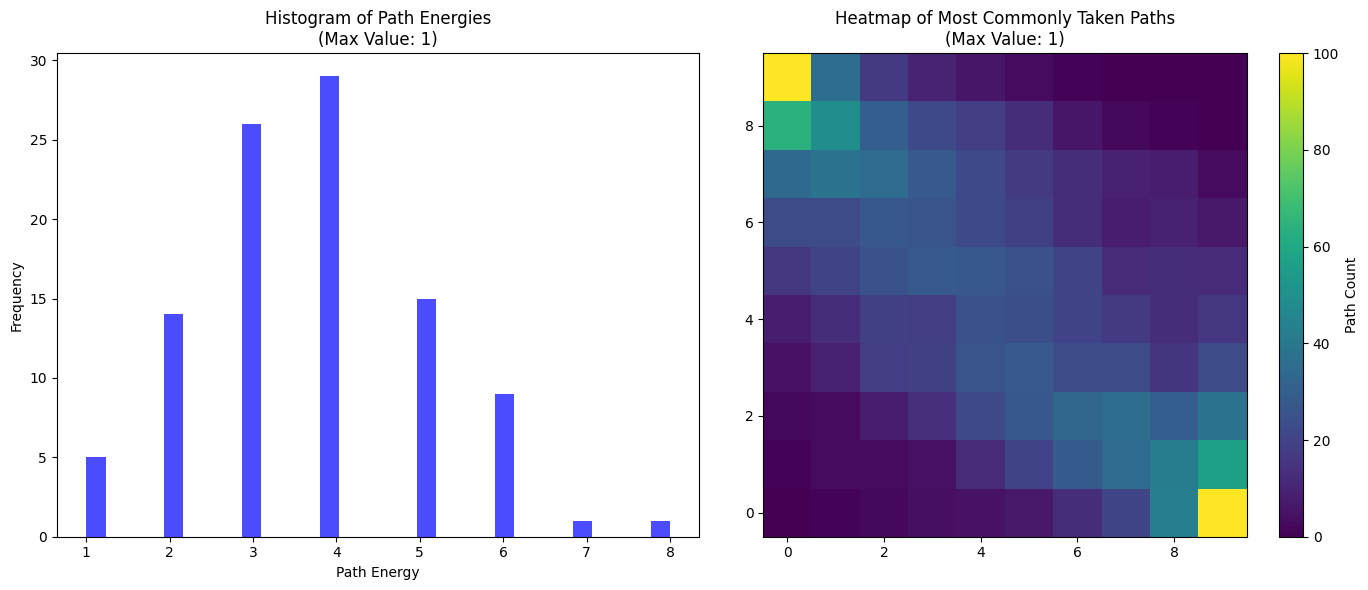

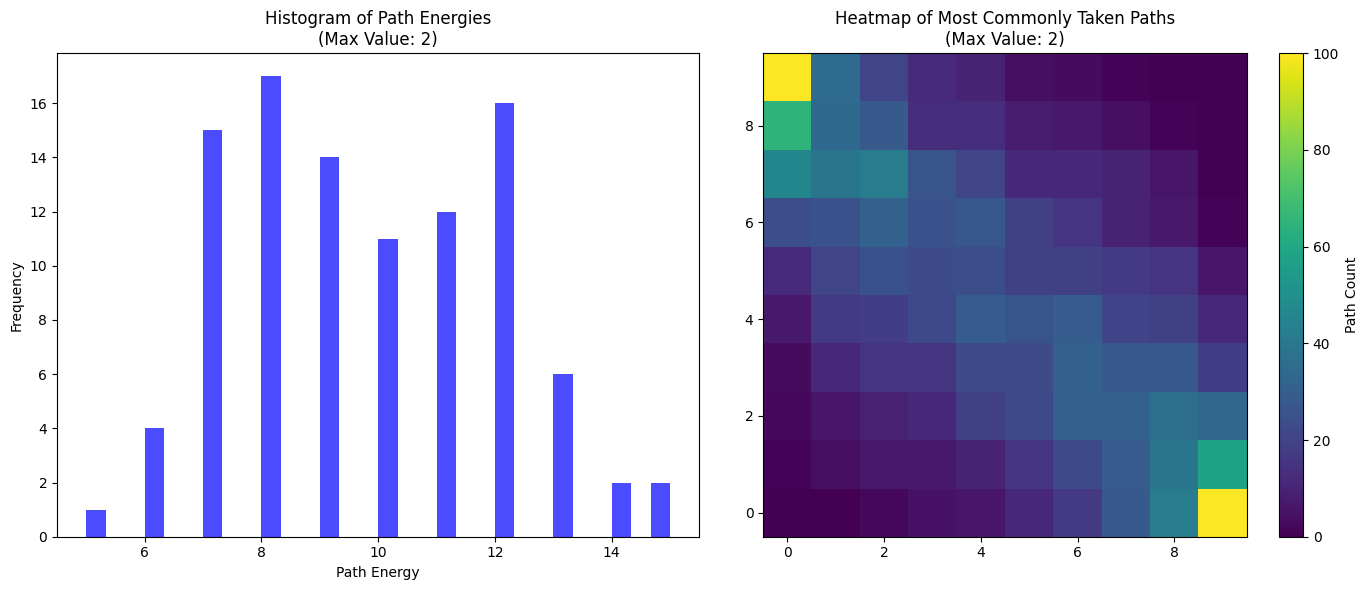

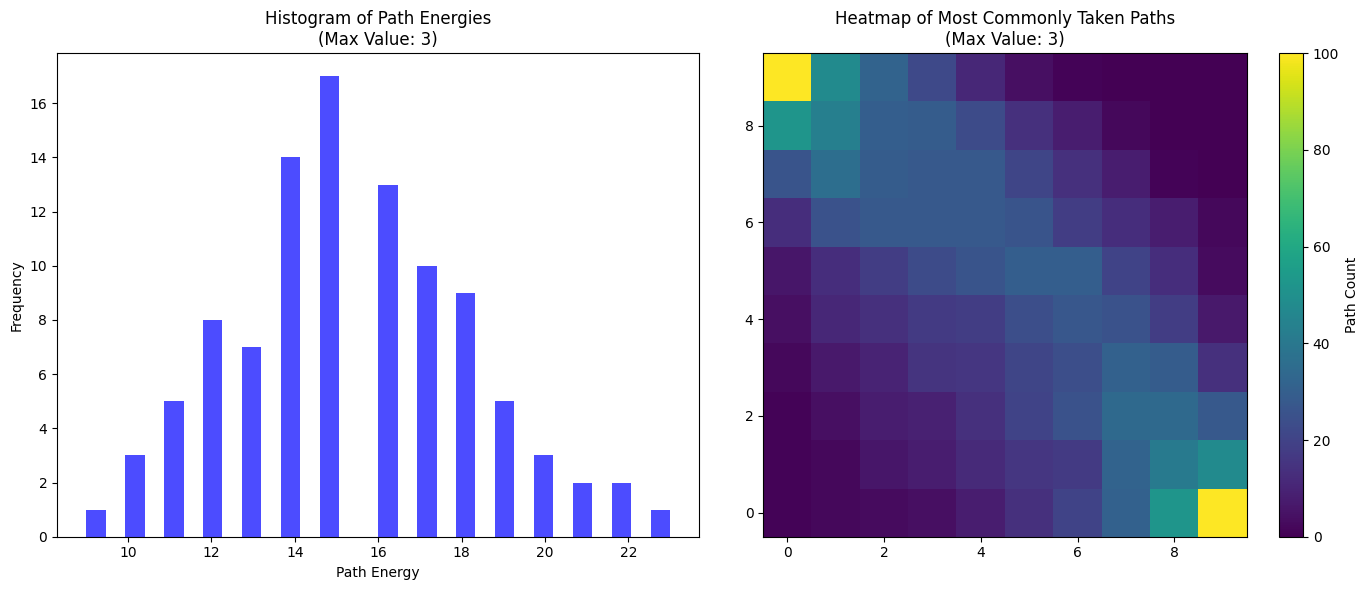

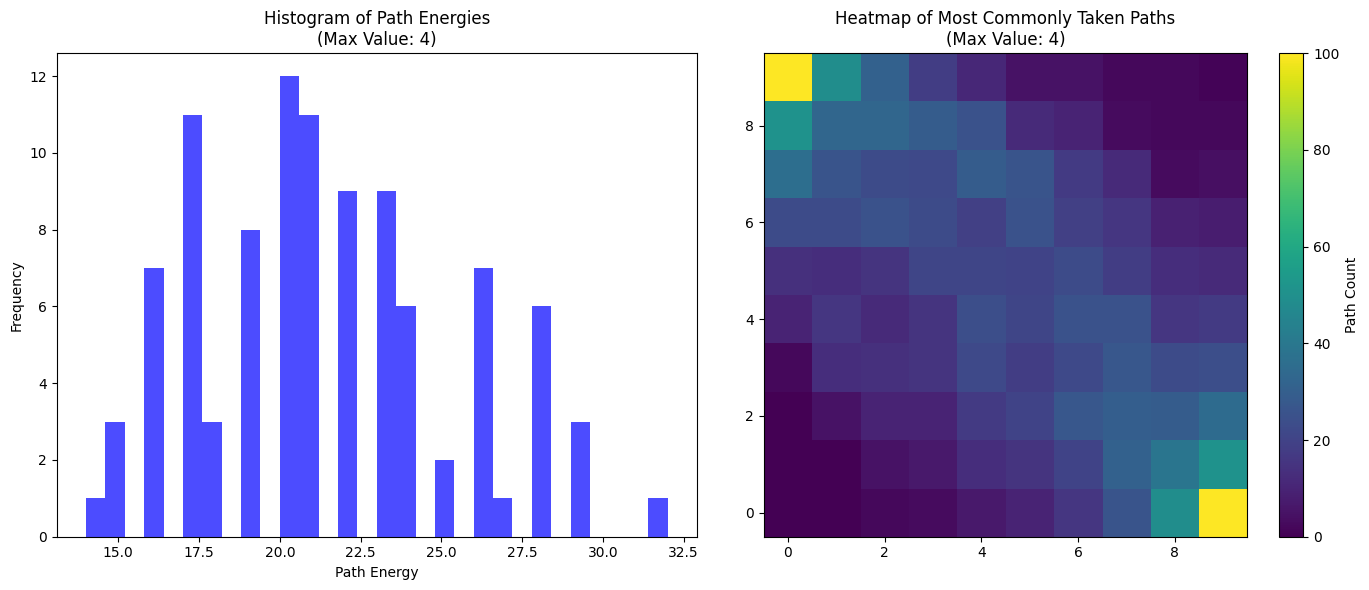

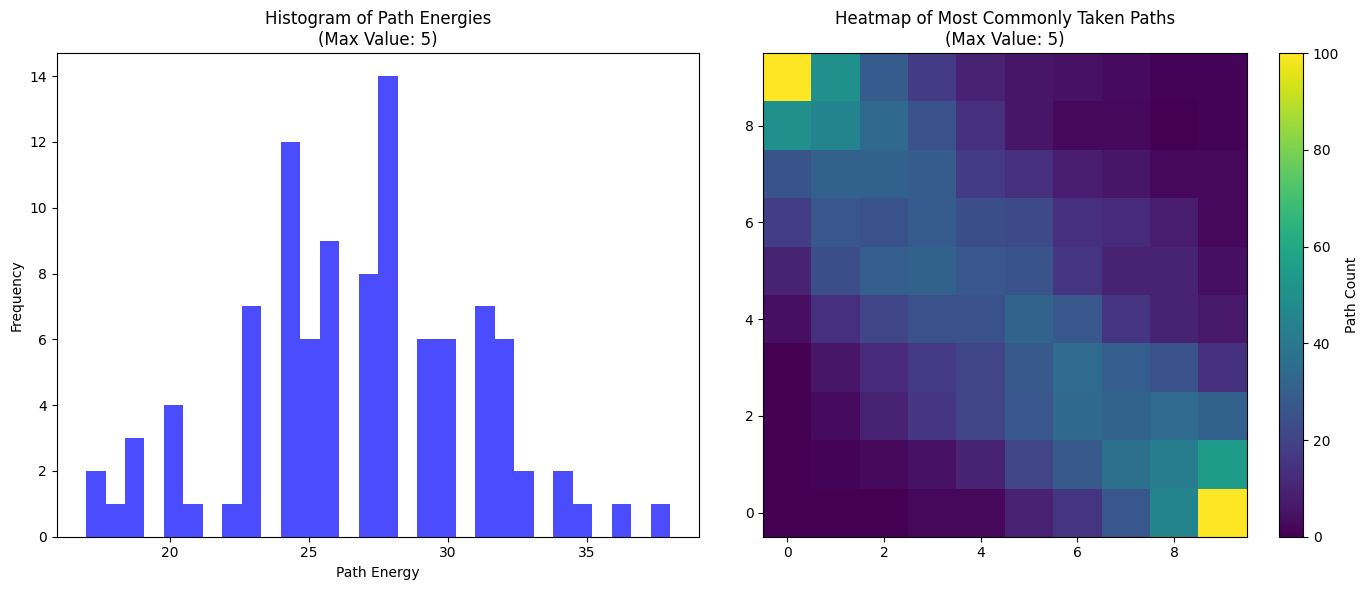

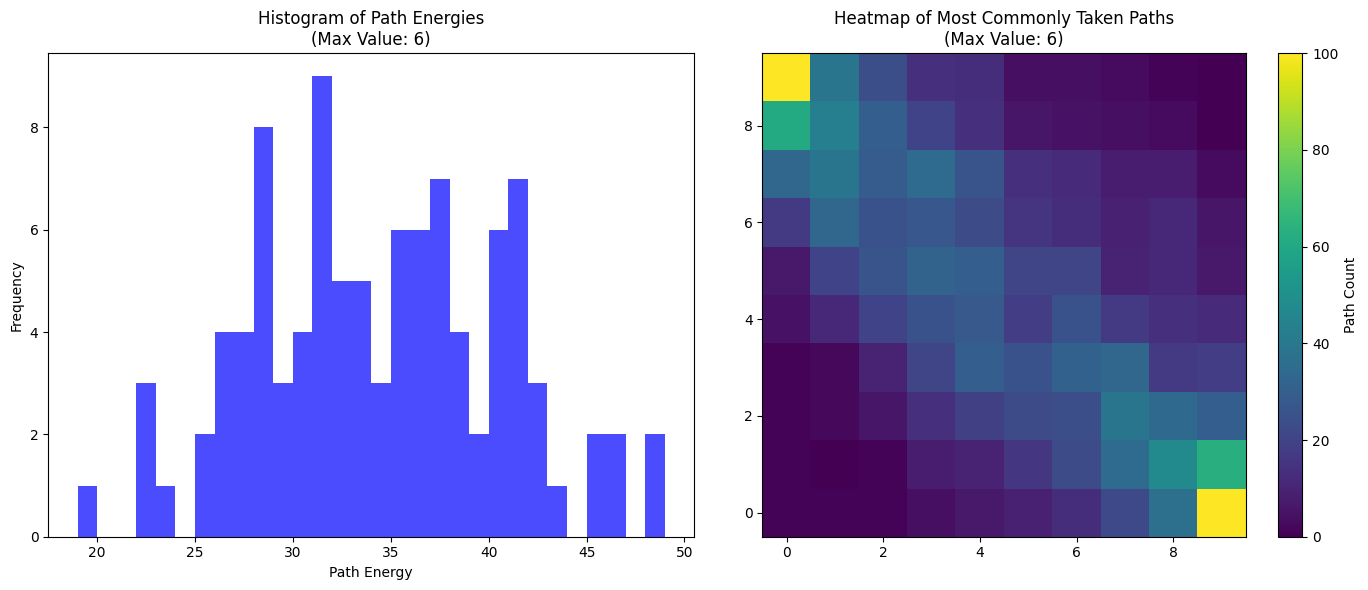

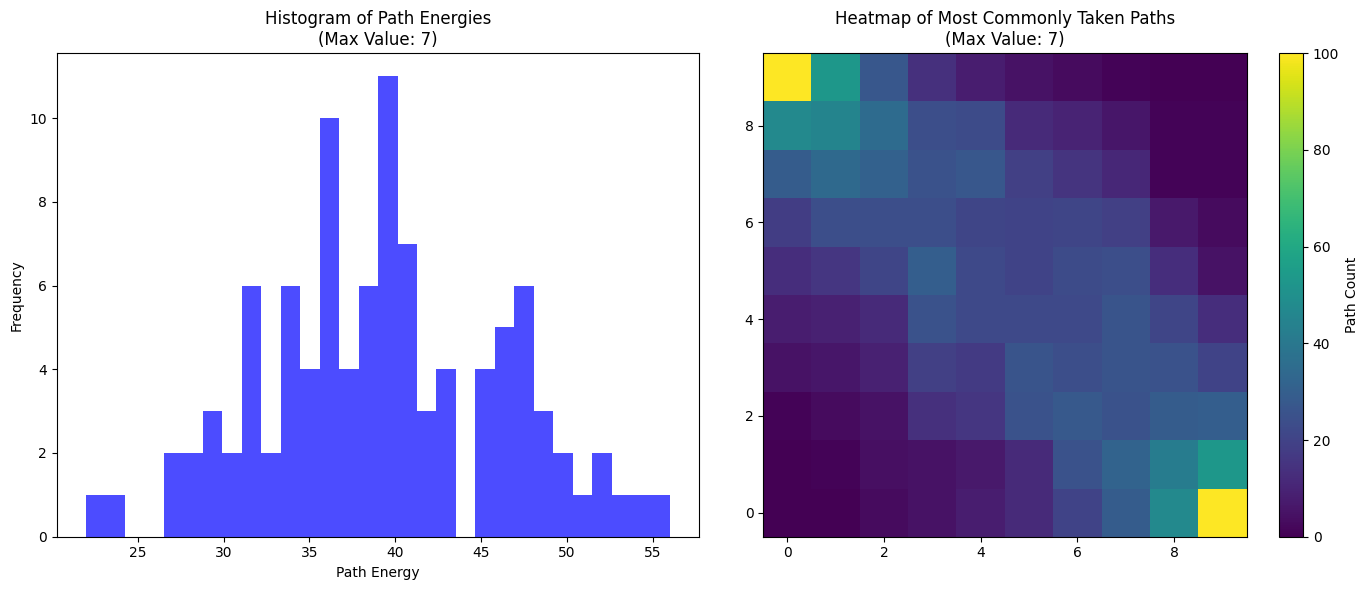

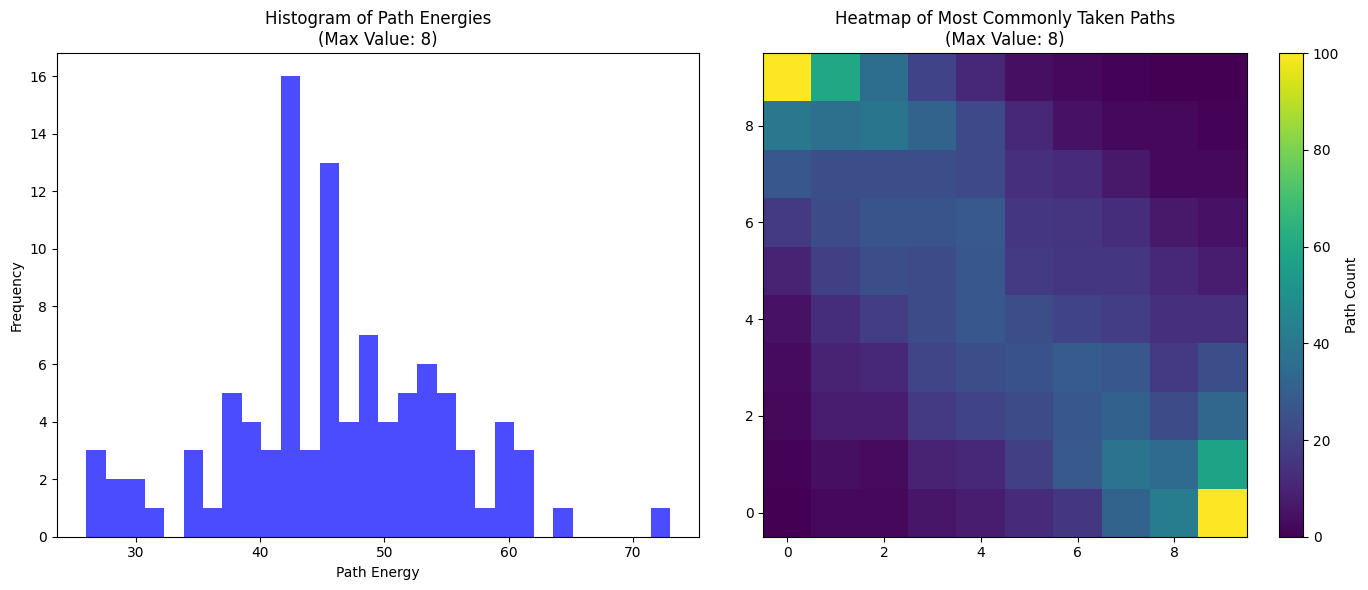

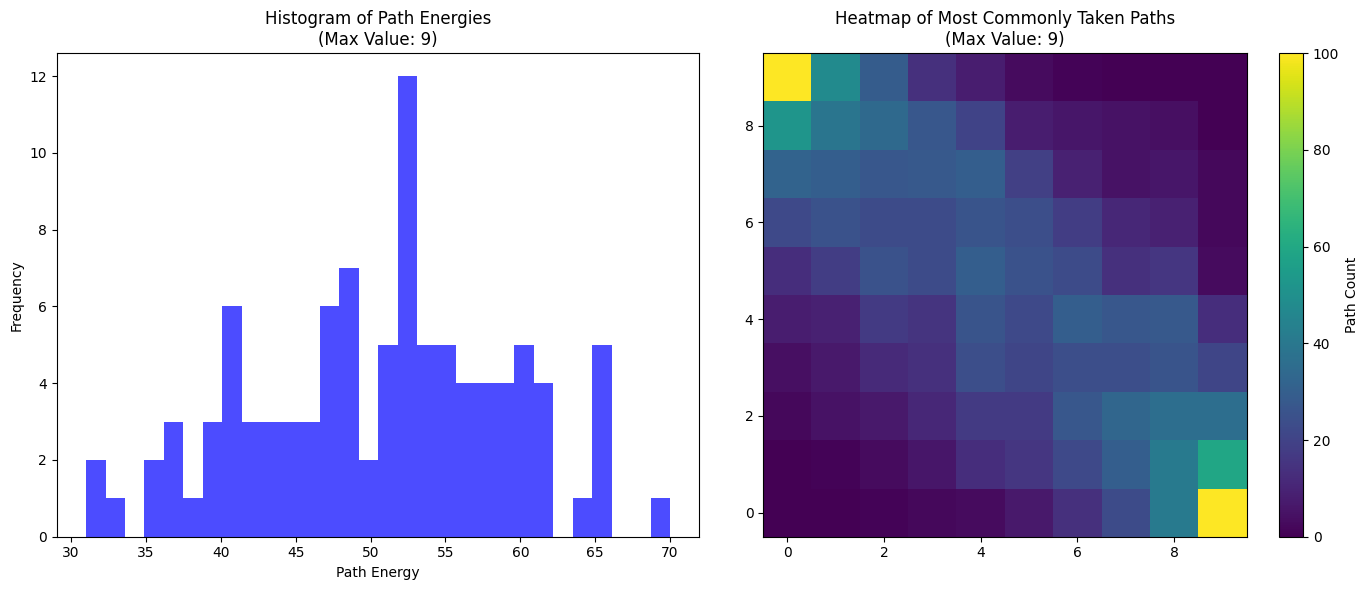

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def initialize_grid(size, distribution='uniform', max_value=1):
    if distribution == 'uniform':
        grid = np.random.randint(0, max_value + 1, size=(size, size))
    elif distribution == 'exponential':
        grid = np.random.exponential(scale=1.0, size=(size, size))
    elif distribution == 'beta':
        grid = np.random.beta(a=2.0, b=5.0, size=(size, size))
    elif distribution == 'gamma':
        grid = np.random.gamma(shape=2.0, scale=1.0, size=(size, size))
    elif distribution == 'lognormal':
        grid = np.random.lognormal(mean=0.0, sigma=1.0, size=(size, size))
    else:
        raise ValueError("Unknown distribution type")
    return grid

def create_graph(grid):
    size = grid.shape[0]
    G = nx.grid_2d_graph(size, size)

    for (i, j) in G.nodes():
        if i < size - 1:
            G.add_edge((i, j), (i + 1, j), weight=grid[i, j] + grid[i + 1, j])
        if j < size - 1:
            G.add_edge((i, j), (i, j + 1), weight=grid[i, j] + grid[i, j + 1])

    return G

def find_shortest_path(G, size):
    start = (size - 1, 0)
    end = (0, size - 1)
    path = nx.shortest_path(G, source=start, target=end, weight='weight')
    return path

def calculate_path_energy(path, grid):
    energy = 0
    for (x, y) in path:
        energy += grid[x, y]
    return energy

def plot_histogram_and_heatmap(path_energies, path_counts, max_value):
    plt.figure(figsize=(14, 6))

    # Plot histogram of path energies
    plt.subplot(1, 2, 1)
    plt.hist(path_energies, bins=30, color='blue', alpha=0.7)
    plt.xlabel('Path Energy')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Path Energies\n(Max Value: {max_value})')

    # Plot heatmap of path counts
    plt.subplot(1, 2, 2)
    plt.imshow(path_counts, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Path Count')
    plt.title(f'Heatmap of Most Commonly Taken Paths\n(Max Value: {max_value})')
    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

def main():
    size = 10  # Grid size
    iterations = 100  # Number of re-initializations and path findings
    max_values = list([i for i in range(1,10)])  # Different integer ranges

    for max_value in max_values:
        # Initialize a grid to accumulate path counts
        path_counts = np.zeros((size, size))
        path_energies = []

        for _ in range(iterations):
            grid = initialize_grid(size, distribution='uniform', max_value=max_value)
            G = create_graph(grid)
            path = find_shortest_path(G, size)
            
            # Accumulate path counts
            for (x, y) in path:
                path_counts[x, y] += 1

            # Calculate path energy and store it
            energy = calculate_path_energy(path, grid)
            path_energies.append(energy)

        # Plot histogram and heatmap
        plot_histogram_and_heatmap(path_energies, path_counts, max_value)

if __name__ == "__main__":
    main()
